### La elasticidad-precio de la demanda
“Mide la variación porcentual que experimenta la cantidad demandada como consecuencia de una variación del precio de un 1%”

#### Interpretación: 
Si la demanda es muy sensible al precio (muy elástica) una subida del precio reduce la demanda tanto que
disminuye el ingreso total. En cambio, si la demanda es muy poco sensible al precio (muy inelástica) una subida del precio no
altera mucho la demanda y aumenta el ingreso total.

La fórmula que utilizariamos para calcular la elasticidad sería la siguiente: 
   
    𝜀p = (𝜕𝑥1/𝜕𝑝1)*(p1/x1)
    
    Si 𝜀p > 1: Tendremos una demanda elástica,  la cantidad demandada cambia más que proporcionalmente con respecto al precio.
    
    Si 𝜀p < 1: Tendremos una demanda inelástica, la cantidad demandada responde menos que proporcionalmente al cambio en el precio.
    
    Si 𝜀p = 1: La demanda es unitaria, lo cual significa que la cantidad demandada cambia en la misma proporción que el cambio en el precio.

La problemática que tenemos en este caso, es que no tenemos función de demanda y no podemos hacer una derivada parcial para encontrar la cantidad demandada de x1 respecto a p1. Por ello analizamos el problema de manera discreta y calculando la elasticidad de la demanda con la fórmula siguiente:
        
    𝜀p = (ΔQ/ΔP)*(P/Q)
    
Siendo: 

    ΔQ: Cambio en la cantidad demandada entre dos puntos en el tiempo (años en este caso).
    
    ΔP: Cambio en el precio medio entre dos años consecutivos.
    
    P y Q: Precio medio y cantidad demandada de un año específico.

In [8]:
%run ./Avocado_EDA.ipynb
#hola

C:\Users\heatb\AppData\Local\Temp\ipykernel_11968\1500790782.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Coun

In [15]:
#Ordenamos los datos por año para poder hacer luego el diferencial y obtener las deltas con los datos agregados de EEUU (Total US)
df_ordenado = df_totalus.sort_values(by="year").reset_index(drop=True)
df_ordenado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_type
0,0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS,TotalUS
1,50,2015-01-11,1.42,669528.88,270966.74,260971.60,3830.42,133760.12,106844.49,26915.63,0.00,organic,2015,TotalUS,TotalUS
2,51,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS,TotalUS
3,20,2015-08-09,1.00,625259.00,170184.00,269330.00,6905.00,178838.00,126058.00,52779.00,0.00,organic,2015,TotalUS,TotalUS
4,19,2015-08-16,1.75,644689.71,150876.80,310229.77,6215.26,177367.88,107593.62,69774.26,0.00,organic,2015,TotalUS,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2,2018-03-11,1.09,40449603.12,14089091.05,10758039.45,707578.82,14894893.80,11392828.89,3229556.62,272508.29,conventional,2018,TotalUS,TotalUS
334,1,2018-03-18,1.05,41386314.12,13707389.51,11061051.69,645380.85,15972492.07,11712807.19,3988101.74,271583.14,conventional,2018,TotalUS,TotalUS
335,0,2018-03-25,1.03,43409835.75,14130799.10,12125711.42,758801.12,16394524.11,12540327.19,3544729.39,309467.53,conventional,2018,TotalUS,TotalUS
336,10,2018-01-14,1.59,1476651.08,145680.62,323669.83,1580.01,1005593.78,858772.69,146808.97,12.12,organic,2018,TotalUS,TotalUS


In [10]:
#Aqui tenemos las variables "AveragePrice" y "Total Volume" agrupadas por años y con la media calculada por año
df_anual = df_ordenado.groupby('year')[['AveragePrice', 'Total Volume']].mean().reset_index()

In [11]:
#Calculamos la delta del Precio y la Cantidad para luego hacer la formula
df_anual['DeltaPrice'] = df_anual['AveragePrice'].diff()
df_anual['DeltaVolume'] = df_anual['Total Volume'].diff()
#Verificamos que las deltas y los precios medios se hayan agruppado por años y se hayan calculado sus respectivas medias
print(df_anual)

   year  AveragePrice  Total Volume  DeltaPrice   DeltaVolume
0  2015      1.257404  1.593515e+07         NaN           NaN
1  2016      1.263558  1.749191e+07    0.006154  1.556768e+06
2  2017      1.436604  1.759145e+07    0.173046  9.953388e+04
3  2018      1.307083  2.181801e+07   -0.129520  4.226562e+06


In [12]:
#Ahora calculamos la formula de la elasticidad con todos los valores de la tabla anterior
df_anual['Elasticidad_Precio_Demanda'] = (df_anual['DeltaVolume'] / df_anual['DeltaPrice']) * (df_anual['AveragePrice'] / df_anual['Total Volume'])

In [13]:
#Creamos la variable para que nos muestre la elasticidad de cada año
df_elasticidad_anual = df_anual[df_anual['year'].isin([2015, 2016, 2017, 2018])]

In [14]:
#Lo printeamos y concluimos
print(df_elasticidad_anual[['year', 'Elasticidad_Precio_Demanda']])

   year  Elasticidad_Precio_Demanda
0  2015                         NaN
1  2016                   18.274063
2  2017                    0.046973
3  2018                   -1.954956


#### Interpretación económica de los resultados

- La elasticidad precio de la demanda de 2015 no se puede calcular ya que no hay datos del periodo anterior (2014)
- La elasticidad precio de la demanda de 2016 es muy elástica (en términos absolutos superior a 1). Esto significa que un aumento del 1% en el precio del aguacate resultó en una disminución del 18.27% en la cantidad demandada.
- La elasticidad precio de la demanda de 2017 fue practicamente inelástica. Esto significa que un cambio en el precio tenía un efecto muy pequeño en la cantidad demandada.
- La elasticidad precio de la demanda de 2018 fue elástica, pero menos que en 2016. Un aumento del 1% en el precio resultó en una disminución del 1.95% en la cantidad demandada.

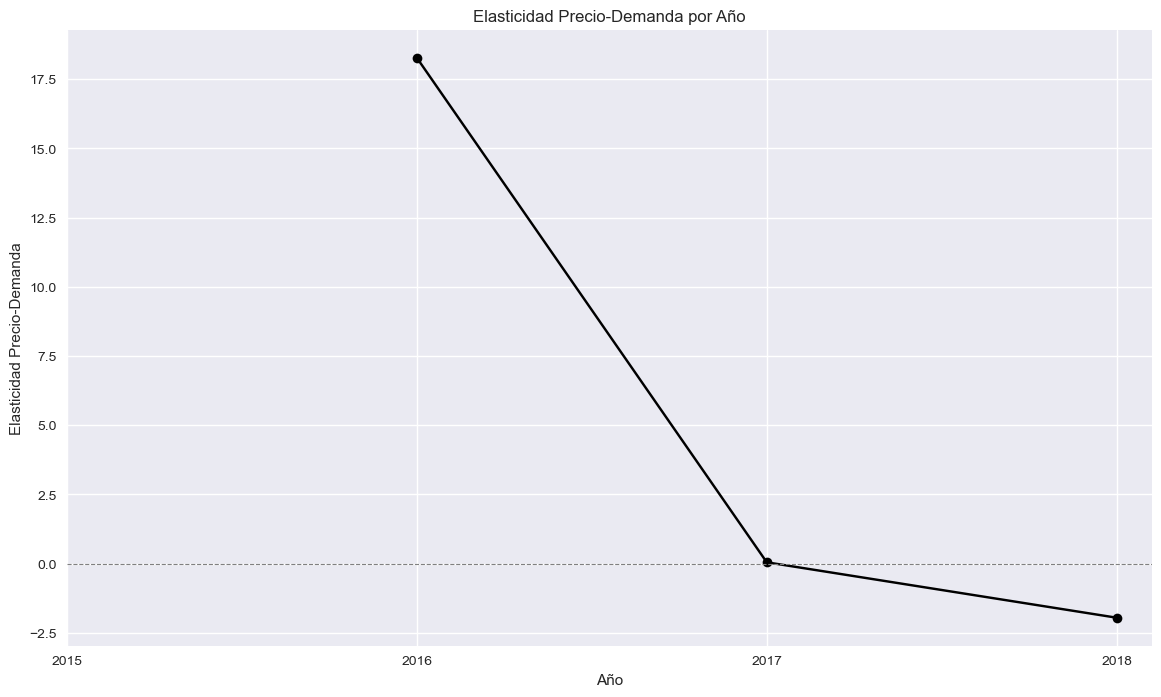

In [16]:
#Preparamos los datos para hacer el gráfico de lineas 
years = df_elasticidad_anual['year']
elasticidad = df_elasticidad_anual['Elasticidad_Precio_Demanda']

#Creamos el gráfico
plt.figure(figsize=(14,8))
plt.plot(years, elasticidad, marker ="o", linestyle="-", color="black")

#Definimos etiquetas para los ejes
plt.title('Elasticidad Precio-Demanda por Año')
plt.xlabel('Año')
plt.ylabel('Elasticidad Precio-Demanda')
plt.grid(True)
plt.xticks(years)  # Mostrar los años en el eje x
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Línea de referencia en y=0
plt.show()

### Cálculo de las diferentes elasticidades según las regiones

In [22]:
#Nuestra intencion aquí es intentar calcular la elasticidad precio/demanda pero en vez de por años solamente, por regiones.
#Primero creamos un dataframe donde se agrupen los precios y los volumenes por region y año
df_regional_anual = df.groupby(["region", "year"])[["AveragePrice", "Total Volume"]].mean().reset_index()

In [23]:
#Usamos .pct_change para obtener el diferencial porcentual de nt - nt-1 
df_regional_anual['PctChangePrice'] = df_regional_anual.groupby('region')['AveragePrice'].pct_change()
df_regional_anual['PctChangeVolume'] = df_regional_anual.groupby('region')['Total Volume'].pct_change()

In [24]:
#Aqui aplicamos la fórmula de la elasticidad a los datos anteriores para obtener la elasticidad regional anual
df_regional_anual['Elasticidad_Precio_Demanda'] = df_regional_anual['PctChangeVolume'] / df_regional_anual['PctChangePrice']

In [25]:
#Y aquí indicamos que incluya solo la elasticidad en cada año desde 2015 hasta 2018
df_elasticidad_regional = df_regional_anual[df_regional_anual['year'].isin([2015, 2016, 2017, 2018])]

In [26]:
#Hemos obtenido las elasticidades interanuales de cada region. Eso nos permitirá graficar cada región y cada año
print(df_elasticidad_regional[['region', 'year', 'Elasticidad_Precio_Demanda']])

               region  year  Elasticidad_Precio_Demanda
0              Albany  2015                         NaN
1              Albany  2016                  -98.040881
2              Albany  2017                   -0.368726
3              Albany  2018                   -2.447001
4             Atlanta  2015                         NaN
..                ...   ...                         ...
211              West  2018                   -2.748066
212  WestTexNewMexico  2015                         NaN
213  WestTexNewMexico  2016                   -4.451930
214  WestTexNewMexico  2017                    2.920538
215  WestTexNewMexico  2018                   -3.345723

[216 rows x 3 columns]


In [27]:
# Ahora agrupamos los datos anteriores en tres variables. Una para cada año con la elasticidad de todas las regiones
df_2016 = df_elasticidad_regional[df_elasticidad_regional['year'] == 2016]
df_2017 = df_elasticidad_regional[df_elasticidad_regional['year'] == 2017]
df_2018 = df_elasticidad_regional[df_elasticidad_regional['year'] == 2018]

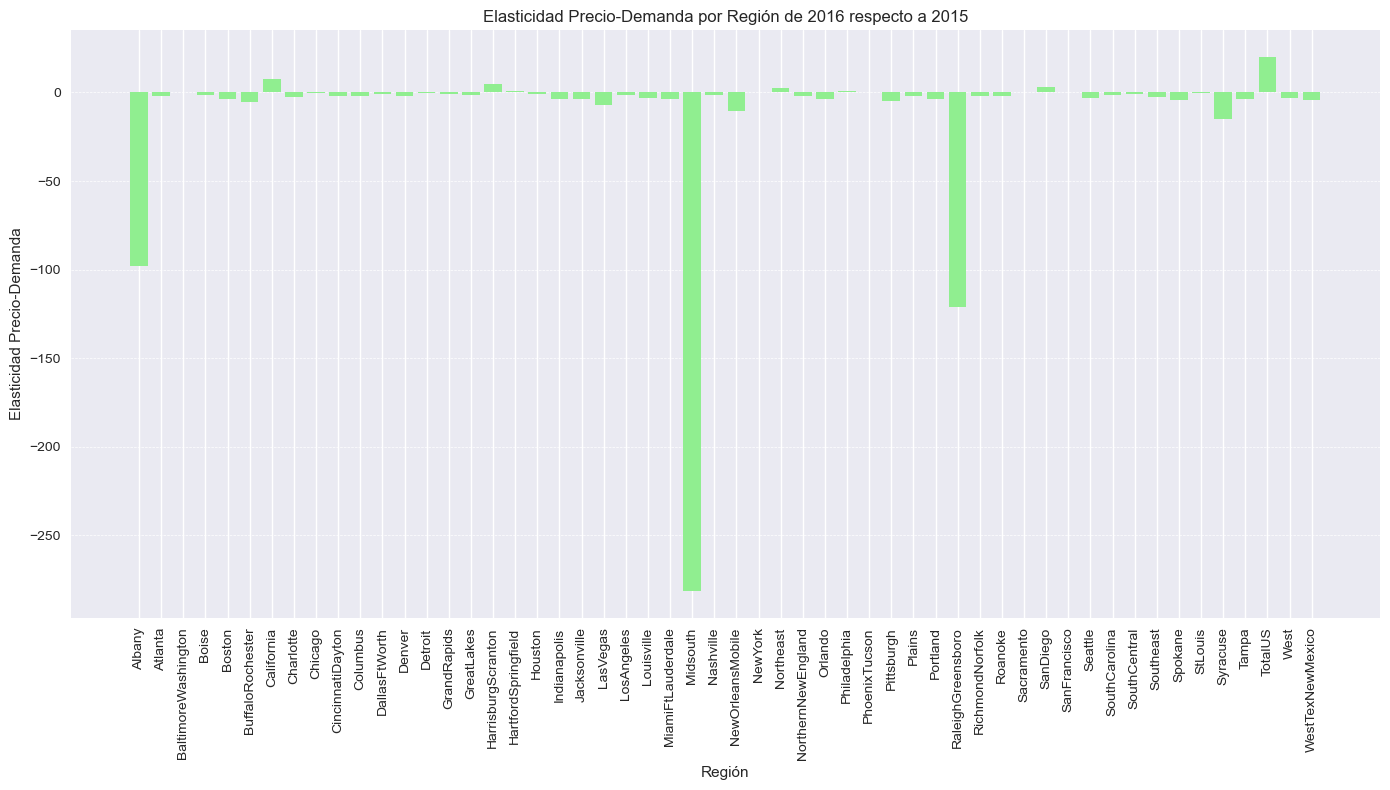

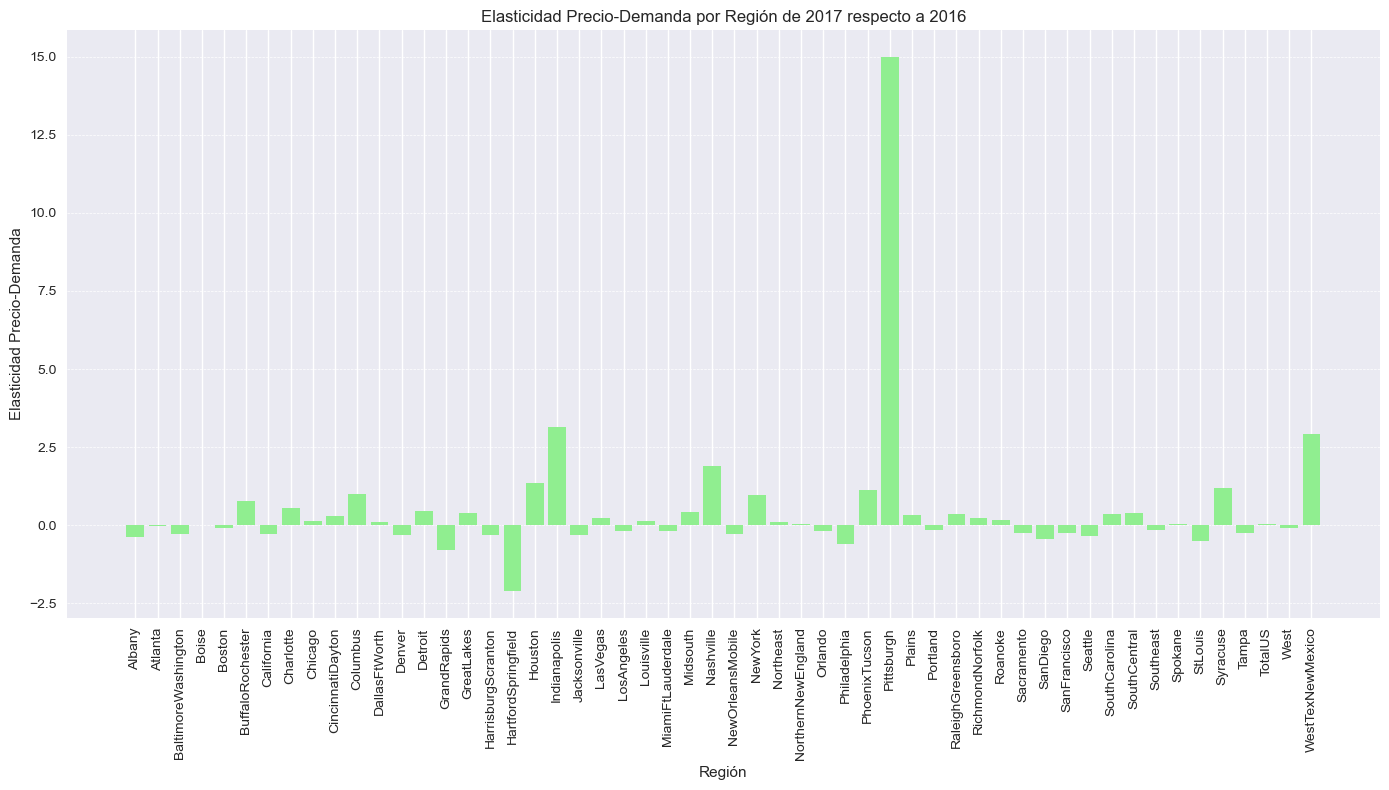

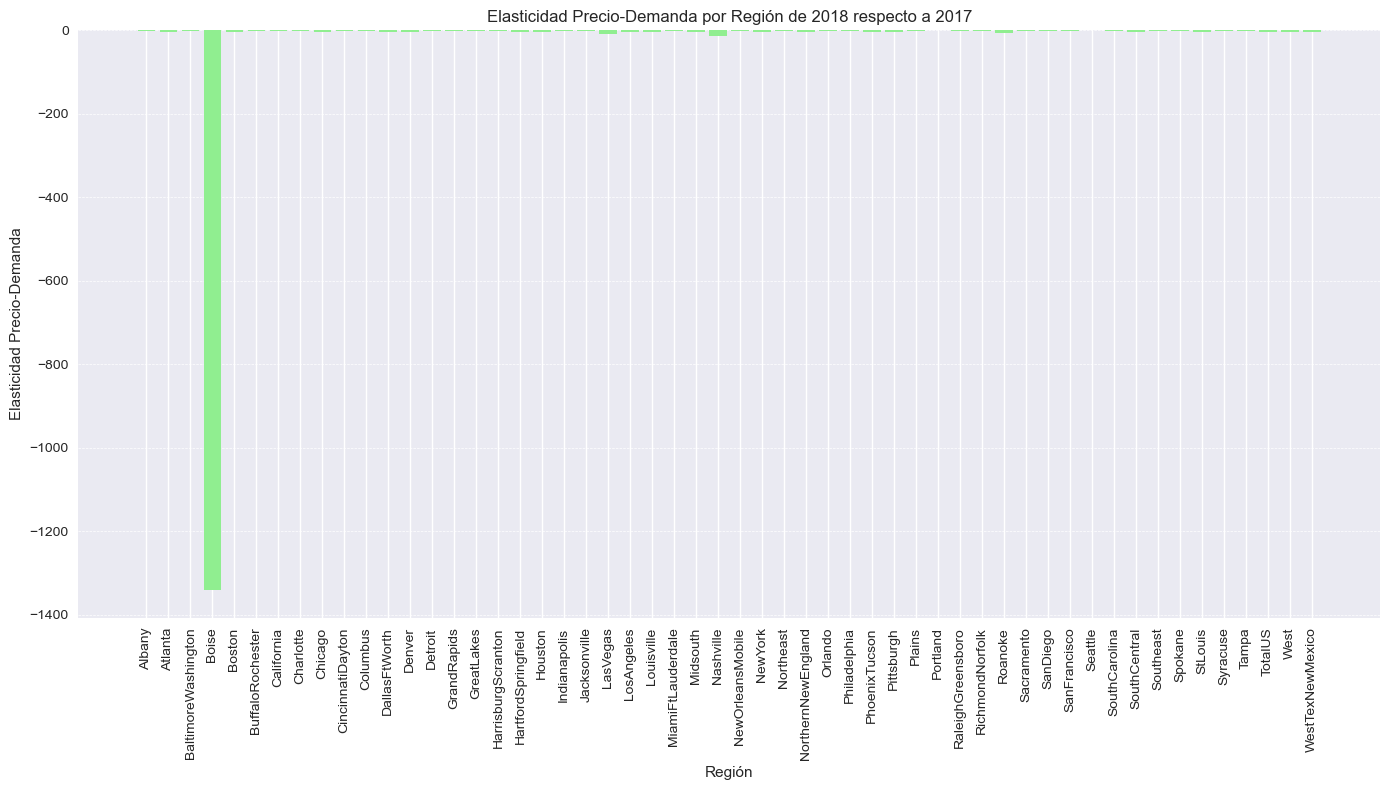

In [28]:
#Hacemos una función dónde ponemos de argumento los datos de los dataframes de cada año con la elasticidad calculada,
#Que tambien pase el año al que se calcula la elasticidad y sobre que año se aplica el diferencial (delta)
def grafico_elasticidad(datos, anyo, anyo_anterior):
    plt.figure(figsize=(14, 8))
    plt.bar(datos["region"], datos["Elasticidad_Precio_Demanda"], color="lightgreen")
    plt.title(f'Elasticidad Precio-Demanda por Región de {anyo} respecto a {anyo_anterior}')
    plt.xlabel('Región')
    plt.ylabel('Elasticidad Precio-Demanda')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
grafico_elasticidad(df_2016, 2016, 2015)
grafico_elasticidad(df_2017, 2017, 2016)
grafico_elasticidad(df_2018, 2018, 2017)

Concluimos que:
- En 2016 la elasticidad del precio sobre la demanda, tiene en general valores elásticos (> 1) pero en especial Albany, Midsouth y Greensboro presentan una elasticidad altamente anómala. Puede ser que al tratarse de regiones de EEUU dónde la renta per cápita es menor, presente una sensibilidad al precio mayor. También puede deberse a algún cambio en lo socioeconómico que pudieron afectar localmente a los agricultores o a las importaciones de esa región.

- En 2017 la elasticidad del precio sobre la demanda ya no tiene tanta elásticidad en general. Hay valores muy dispares cercanos a 1, concluyendo pues que tenemos varios casos de elasticidad unitaria. Aún así Pittsburgh presenta elasticidad muy elevada debido a factores donde se tendría que indagar más a fondo. Causas potenciales pueden ser soioeconómicas o quizás regionales.

- En 2018 la elasticidad del precio sobre la demanda presenta un outlier muy claro en Boise, así que procedemos a quitarlo para ver si puede ser más representativo el cálculo de la elasticidad de esta forma. Esto se puede deber a que 2018 está comprendido solo en el mes de Enero, Febrero y Marzo.

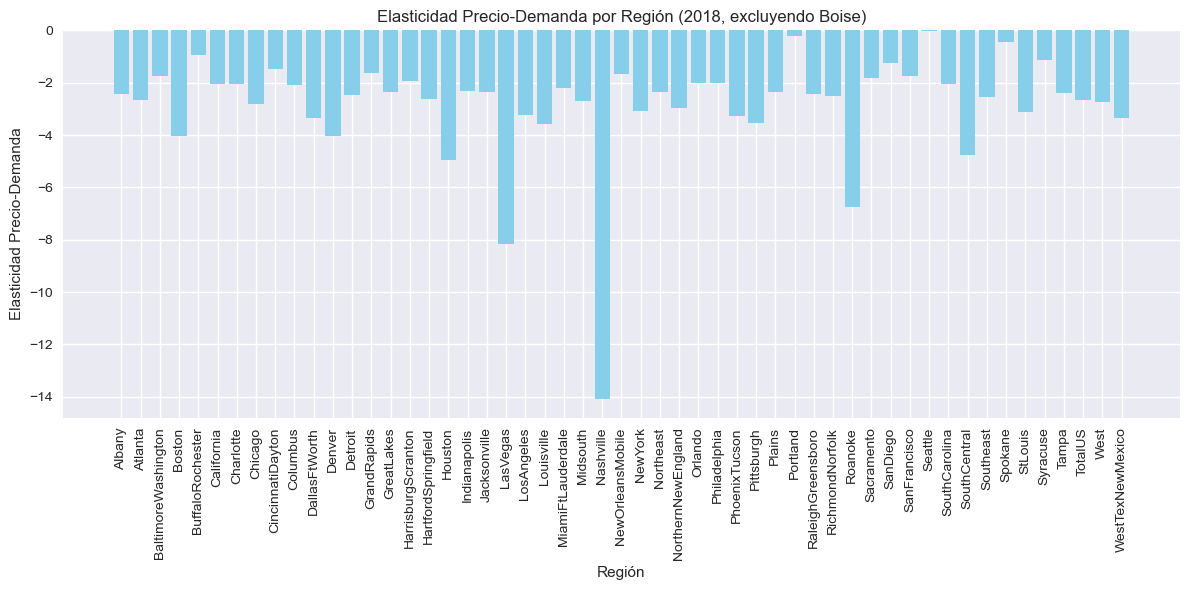

In [29]:
# Filtramos el DataFrame para 2018 excluyendo la región de Boise
df_2018 = df_elasticidad_regional[(df_elasticidad_regional['year'] == 2018) & (df_elasticidad_regional['region'] != 'Boise')]

# Creamos un gráfico de barras con las regiones y sus elasticidades
plt.figure(figsize=(12, 6))
plt.bar(df_2018['region'], df_2018['Elasticidad_Precio_Demanda'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Región')
plt.ylabel('Elasticidad Precio-Demanda')
plt.title('Elasticidad Precio-Demanda por Región (2018, excluyendo Boise)')
plt.tight_layout()
plt.show()

- Aquí podemos observar mejor que en 2018 que la elasticidad fue muy elevada (demandas muy elásticas) ya que la mayoría de regiones superaban las elasticidades > 1. Es decir que cualquier cambio en el precio afectó la demanda de aguacates, en cierta medida en 2018. Especialmente en Nashville (14%), Las Vegas(-8%) y Roanoke (-7%) aproximadamente.
- Es importante destacar que 2018 solamente está comprendido en 3 meses (Enero, Febrero y Marzo) y por ello puede dar resultados con distribuciones poco normalizadas.

### Cálculo de la elasticidad según el tipo de bolsa

In [30]:
#En este apartado vamos a calcular la elasticidad según el tipo de tamaño de la bolsa de aguacate vendida
#Agrupamos por años a las variables que contienen el tamaño de la bolsa y el total de la bolsa.
#Hacemos una suma total de cada tamaño de bolsa ya que si trabajamos con valores absolutos, podremos obtener el valor de la elasticidad de cada tamaño.
#Utilizamos la variable Total US para ver los datos agregados
df_bolsas_anual = df_totalus.groupby("year")[["Total Bags", "Small Bags", "Large Bags", "XLarge Bags", "AveragePrice"]].sum().reset_index()

In [31]:
#Calculamos las deltas con el metodo .diff(), ya que en este caso vamos a trabajar con valores abs. y no con porcentuales 
df_bolsas_anual['DeltaPrice'] = df_bolsas_anual['AveragePrice'].diff()
df_bolsas_anual['DeltaTotalBags'] = df_bolsas_anual['Total Bags'].diff()
df_bolsas_anual['DeltaSmallBags'] = df_bolsas_anual['Small Bags'].diff()
df_bolsas_anual['DeltaLargeBags'] = df_bolsas_anual['Large Bags'].diff()
df_bolsas_anual['DeltaXLargeBags'] = df_bolsas_anual['XLarge Bags'].diff()

In [32]:
#Aplicamos la formula de la elasticidad para cada tipo de tamaño:
df_bolsas_anual['Elasticidad_TotalBags'] = (df_bolsas_anual['DeltaTotalBags'] / df_bolsas_anual['DeltaPrice']) * (df_bolsas_anual['AveragePrice'] / df_bolsas_anual['Total Bags'])
df_bolsas_anual['Elasticidad_SmallBags'] = (df_bolsas_anual['DeltaSmallBags'] / df_bolsas_anual['DeltaPrice']) * (df_bolsas_anual['AveragePrice'] / df_bolsas_anual['Small Bags'])
df_bolsas_anual['Elasticidad_LargeBags'] = (df_bolsas_anual['DeltaLargeBags'] / df_bolsas_anual['DeltaPrice']) * (df_bolsas_anual['AveragePrice'] / df_bolsas_anual['Large Bags'])
df_bolsas_anual['Elasticidad_XLargeBags'] = (df_bolsas_anual['DeltaXLargeBags'] / df_bolsas_anual['DeltaPrice']) * (df_bolsas_anual['AveragePrice'] / df_bolsas_anual['XLarge Bags'])

In [33]:
#Obtenemos unos valores muy altos de elasticidad negativa en 2016 y de inelasticidad en 2017 y 2018 para todo tipo de tamaños.
print(df_bolsas_anual[['year', 'Elasticidad_TotalBags', 'Elasticidad_SmallBags', 'Elasticidad_LargeBags', 'Elasticidad_XLargeBags']])

   year  Elasticidad_TotalBags  Elasticidad_SmallBags  Elasticidad_LargeBags  \
0  2015                    NaN                    NaN                    NaN   
1  2016              95.692519              86.169243             123.600397   
2  2017               0.868468               0.751497               1.200970   
3  2018               0.601018               0.612639               0.568247   

   Elasticidad_XLargeBags  
0                     NaN  
1              149.182337  
2                1.255242  
3                0.587758  


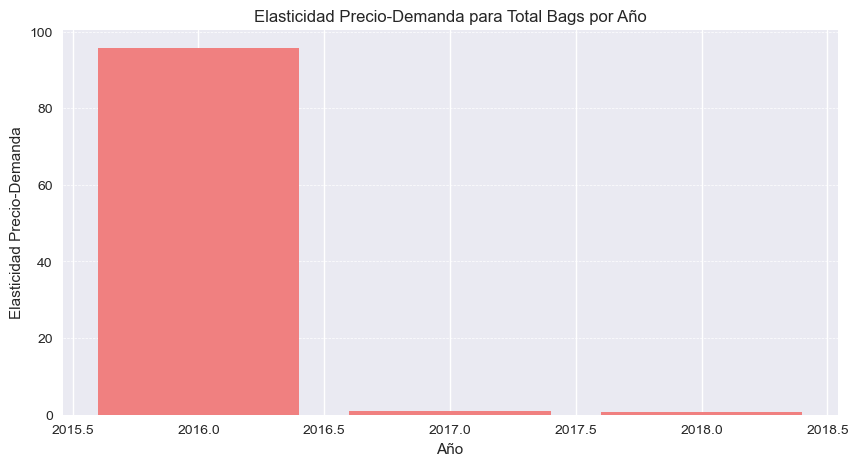

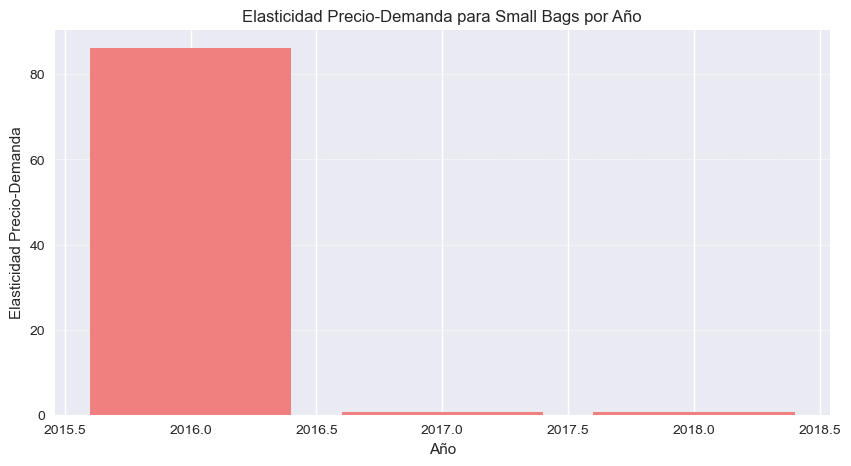

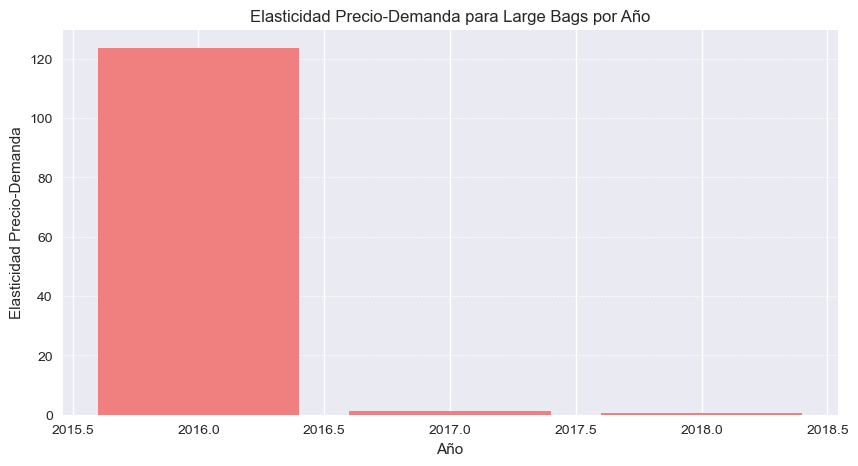

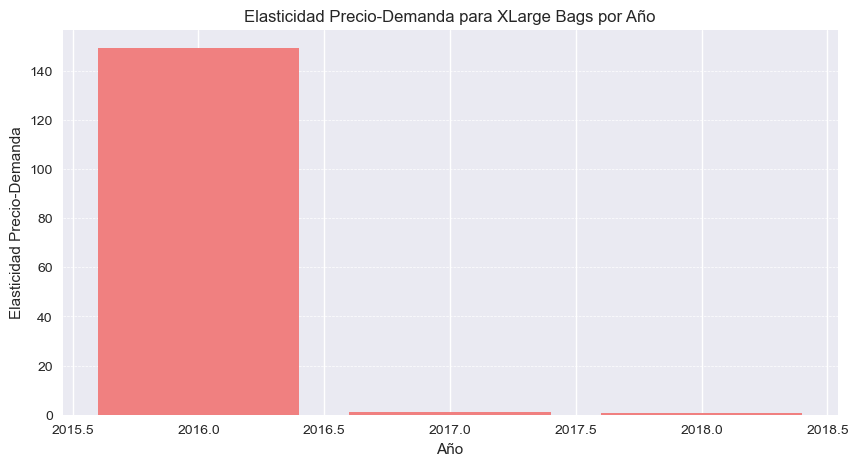

In [34]:
def plot_elasticidad_bolsas(datos, elasticidad_bolsas, tipo_bolsas):
    plt.figure(figsize=(10, 5))
    plt.bar(datos['year'], datos[elasticidad_bolsas], color='lightcoral')
    plt.title(f'Elasticidad Precio-Demanda para {tipo_bolsas} por Año')
    plt.xlabel('Año')
    plt.ylabel('Elasticidad Precio-Demanda')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()

# Graficamos la elasticidad para cada tipo de bolsa
plot_elasticidad_bolsas(df_bolsas_anual, 'Elasticidad_TotalBags', 'Total Bags')
plot_elasticidad_bolsas(df_bolsas_anual, 'Elasticidad_SmallBags', 'Small Bags')
plot_elasticidad_bolsas(df_bolsas_anual, 'Elasticidad_LargeBags', 'Large Bags')
plot_elasticidad_bolsas(df_bolsas_anual, 'Elasticidad_XLargeBags', 'XLarge Bags')

Haciendo una interpretación de los resultados concluimos que:
- En 2016 independientemente del tamaño de la bolsa la elasticidad presenta valores muy elevados. Esto significa que cualquier cambio en el precio de los aguacates tuvo un impacto muy negativo en la demanda. Indagando sobre las posibles causas, en 2016 California fue el mayor exportador de Aguacates dentro de EEUU y no México como lo venia siendo (ocupando un 85% aproximado de la cuota de mercado de aguacates en EEUU). 
- Como en California hay una gran presión fiscal y los agricultores tienen un mayor costo de producción por unidad respecto a los Mexicanos, esto hizo que se aumentase el precio de venta de los aguacates ese mismo año, generando un entorno donde los consumidores eran más sensibles a las variaciones en el precio.
- Durante 2016, un aumento de precios debido a una menor producción pudo haber provocado una fuerte respuesta por parte de los consumidores en otras regiones, lo cual se refleja en la elasticidad alta y negativa de ese año.
- Este análisis confirma que factores externos como la oferta limitada y los costos de producción pueden tener un impacto significativo en la elasticidad precio de la demanda, especialmente en productos agrícolas sensibles a las variaciones de oferta.

Se puede encontrar la fuente de la noticia aquí: https://edis.ifas.ufl.edu/publication/FE1150

### Cálculo de la elasticidad según la comparativa de aguacates Orgánicos y Convencionales

In [35]:
#Aqui calculamos la media anual para tener una mejor representacion del precio medio de cada tipo de aguacate
#Hacemos una suma del total por año ya que así tenemos la demanda agregada 
df_tipo_anual = df_totalus.groupby(['type', 'year']).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
}).reset_index()

In [36]:
#Aqui calculamos el diferencial para tener el cambio porcentual del año anterior y obtener las deltas
df_tipo_anual['PctChange_Price'] = df_tipo_anual.groupby('type')['AveragePrice'].pct_change()
df_tipo_anual['PctChange_Volume'] = df_tipo_anual.groupby('type')['Total Volume'].pct_change()

In [37]:
#Luego calculamos la elasticidad de cada tipo
df_tipo_anual['Elasticidad_Precio_Demanda'] = (df_tipo_anual['PctChange_Volume'] / df_tipo_anual['PctChange_Price']) 

In [38]:
#Ya tenemos la elasticidad segun el tipo de aguacate
print(df_tipo_anual[['type', 'year', 'Elasticidad_Precio_Demanda']])

           type  year  Elasticidad_Precio_Demanda
0  conventional  2015                         NaN
1  conventional  2016                    2.670126
2  conventional  2017                    0.106487
3  conventional  2018                    5.435668
4       organic  2015                         NaN
5       organic  2016                  -31.294634
6       organic  2017                    2.480987
7       organic  2018                   12.078700


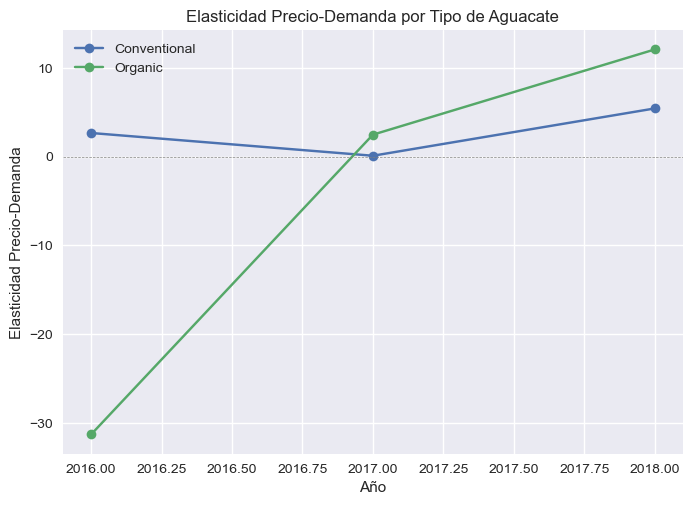

In [39]:
for tipo in df_tipo_anual['type'].unique():
    df_filtrado = df_tipo_anual[df_tipo_anual['type'] == tipo]
    plt.plot(df_filtrado['year'], df_filtrado['Elasticidad_Precio_Demanda'], marker='o', label=f'{tipo.capitalize()}')

# Configuración del gráfico
plt.title('Elasticidad Precio-Demanda por Tipo de Aguacate')
plt.xlabel('Año')
plt.ylabel('Elasticidad Precio-Demanda')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Línea en y=0 para referencia
plt.legend()
plt.grid(True)
plt.show()

Viendo estos resultados concluimos que:
- La elasticidad del precio respecto a la demanda de aguacates orgánicos es mucho mayor a los de tipo convencional ya que todo producto agrícola orgánico es reconocido como más saludable, ya que el convencional tiene una mayor cantidad de pesticidas e insecticidas utilizados durante su cultivo. 
- Esto hace que la demanda de aguacates orgánicos sea preferida a los convencionales, pero si pudieramos hacer una función de preferencias del consumidor como indica la teoria microeconómica, observariamos que el consumidor está dispuesto a pagar por un aguacate orgánico hasta cierto punto. Es decir, considera el aguacate orgánico respecto al aguacate convencional como un bien sustitutivo, ya que si sus preferencias de consumir aguacate orgánico fueran mayores, la elasticidad no sería tan elevada ya que el consumidor tendría una mayor disposición a pagar por ese tipo de aguacate aunque el precio haya aumentado. 

### Análisis de la Elasticidad Precios-Ventas

In [40]:
df_ordenado['PctChange_Price'] = df_ordenado['AveragePrice'].pct_change()
df_ordenado['PctChange_Volume'] = df_ordenado['Total Volume'].pct_change()

In [41]:
df_ordenado['Elasticidad_Precio_Demanda'] = df_ordenado['PctChange_Volume'] / df_ordenado['PctChange_Price']


In [42]:
df_elasticidad = df_ordenado.dropna(subset=['Elasticidad_Precio_Demanda'])


In [43]:
print(df_elasticidad[['AveragePrice', 'Total Volume', 'Elasticidad_Precio_Demanda']])


     AveragePrice  Total Volume  Elasticidad_Precio_Demanda
1            1.42     669528.88                   -1.971701
2            1.46     612910.15                   -3.002059
3            1.00     625259.00                   -0.063948
4            1.75     644689.71                    0.041435
5            1.72     666276.26                   -1.953212
..            ...           ...                         ...
333          1.09   40449603.12                   -0.382934
334          1.05   41386314.12                   -0.631041
335          1.03   43409835.75                   -2.566909
336          1.59    1476651.08                   -1.776720
337          1.51    1517332.70                   -0.547555

[337 rows x 3 columns]


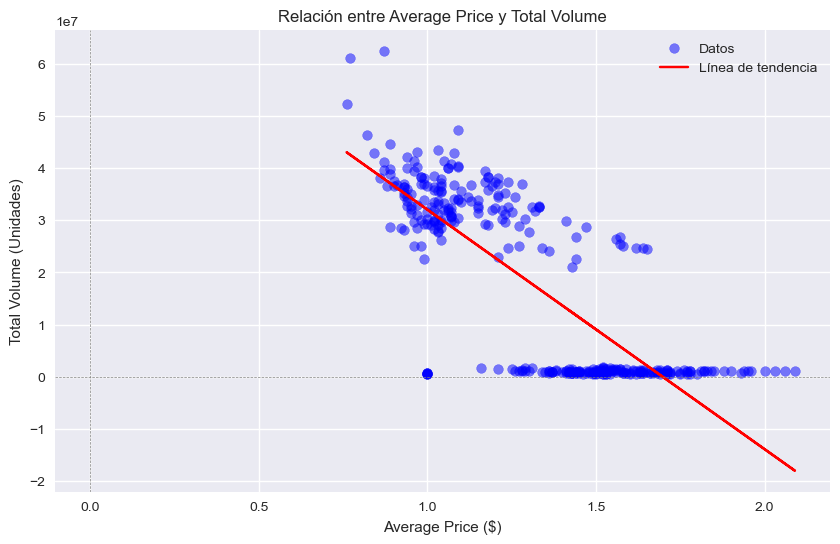

In [44]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_elasticidad['AveragePrice'], df_elasticidad['Total Volume'], alpha=0.5, color='blue', label='Datos')

# Ajustar una línea de tendencia
m, b = np.polyfit(df_elasticidad['AveragePrice'], df_elasticidad['Total Volume'], 1)
plt.plot(df_elasticidad['AveragePrice'], m * df_elasticidad['AveragePrice'] + b, color='red', label='Línea de tendencia')

# Configuración del gráfico
plt.title('Relación entre Average Price y Total Volume')
plt.xlabel('Average Price ($)')
plt.ylabel('Total Volume (Unidades)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Línea en y=0 para referencia
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)  # Línea en x=0 para referencia
plt.legend()
plt.grid(True)
plt.show()